In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [5]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [6]:
# Check data size
df.shape

(850, 10)

In [7]:
# Data cleaning
# We do not need address
df.drop('Address', axis=1, inplace=True)

In [9]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [12]:
# Normalization
from sklearn.preprocessing import StandardScaler
x = df.values[:, 1:] # except Customer ID
x = np.nan_to_num(x)
norm_data = StandardScaler().fit_transform(x)
norm_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Model

The dataset consists of various features such as age, number of years employed, income, debt, etc., for different customers. Our goal is to cluster customers based on these features.

In [15]:
k = 3
kmeans = KMeans(n_clusters = k) # init and n_init accept standard value
kmeans.fit(norm_data)
print(kmeans.labels_)

C:\Users\Mirsaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mirsaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[1 2 0 1 2 2 1 1 1 2 0 1 1 1 0 1 1 1 2 1 1 1 0 2 2 1 1 1 1 1 1 2 0 1 1 1 0
 0 1 2 0 2 1 2 1 2 1 1 1 1 2 2 0 1 0 0 0 1 1 1 2 1 2 2 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 2 1 1 0 2 1 2 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 2 1 0 0 2 1 1 1 1 1
 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 2 1 1 0
 1 1 1 2 0 1 1 1 1 2 0 0 1 2 1 1 1 1 1 1 1 1 2 1 1 0 1 0 1 1 0 2 0 1 1 2 0
 2 1 1 1 1 1 2 1 0 1 1 1 2 2 1 2 1 0 1 1 0 1 2 1 0 1 1 1 1 1 0 0 2 1 1 0 2
 1 1 1 1 2 1 1 0 1 1 1 1 2 1 1 0 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 0 1 0 1
 1 1 2 1 0 2 0 1 2 1 1 0 1 1 1 1 0 0 0 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 0 1 1
 0 1 0 2 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 2 1 0 1 1 1 0 0 1 1 1 2 0
 1 1 0 1 2 1 1 1 1 1 0 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 0 1 0 1 1 1 2 2 1
 0 1 2 0 0 1 1 1 0 1 1 1 1 1 2 1 2 1 1 1 1 0 1 0 1 1 1 2 1 1 1 1 0 1 1 0 0
 2 1 1 1 1 1 0 0 1 2 0 2 1 1 0 1 1 2 2 1 0 1 1 2 1 0 1 2 1 1 1 2 1 1 1 1 2
 1 0 1 1 1 1 2 0 1 1 2 1 0 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 0 1 1 1 0 1
 0 1 1 1 1 1 2 0 0 1 2 1 

In [20]:
# Customers clustered. Let's add this to data
df['Cluster'] = kmeans.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


### What can we say about clusters?
We can obtain information about clusters by finding the centroid of each cluster. For this, we can use the groupby and mean functions.

In [22]:
df.groupby('Cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


What conclusions can we draw about customers in each cluster?

For example, if we look at age, we might categorize clusters as follows: 0-cluster as older individuals (age 43+), 1-cluster as middle-aged (age 33+), and 2-cluster as younger individuals (up to age 31).

Columns like Income (income) and Years Employed (years working) serve as good indicators for distinguishing each cluster.

So, we can describe each cluster as follows:

2-cluster - Older individuals with extensive experience and high income.
1-cluster - Younger individuals with less experience and lower income.
0-cluster - Middle-aged individuals with moderate experience (3-7 years) and lower income.

In general, you could name clusters based on the most important features for your business. For instance, if you're in the finance sector and you've shifted towards financial services like installment payment plans or credit, you might give importance to features like Debt (debt) and Defaulted (defaulted) columns.

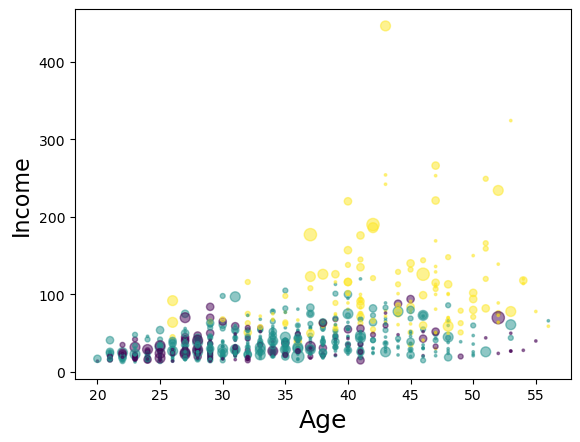

In [25]:
area = np.pi * (x[:,1]) ** 2
plt.scatter(x[:,0], x[:,3], s=area, c=kmeans.labels_.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()